# Getting started with Landmark Explanation

Note: you can run **[this notebook live in Google Colab](https://colab.research.google.com/github.com/softlab-unimore/landmark/blob/master/quick_start_DeepMatcher.ipynb)** and use free GPUs provided by Google.

This tutorial describes how to effortlessly explaining entity matching. Specifically, we will see how to match pairs of tuples (also called data records or table rows) to determine if they refer to the same real world entity. To do so, we will need labeled examples as input, i.e., tuple pairs which have been annotated as matches or non-matches. This will be used to train a model to explain using supervised learning. After that you will apply Landmark to get an explanation of the model over a record from your data. 

In this notebook you will use the [DeepMatcher](https://github.com/anhaidgroup/deepmatcher) library.



## Step 0. Setup

If you are running this notebook inside Colab, you will first need to install necessary packages by running the code below:

In [1]:
!pip install deepmatcher
import torchtext
if torchtext.__version__ > '0.9.0':
  !pip install 'torchtext<0.9.0' --force-reinstall

### clone landmark code

In [21]:
!git clone https://github.com/softlab-unimore/landmark.git
!pip install -r landmark/requirements.txt

Cloning into 'landmark'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 110 (delta 40), reused 95 (delta 28), pack-reused 0
Receiving objects: 100% (110/110), 1.07 MiB | 14.77 MiB/s, done.
Resolving deltas: 100% (40/40), done.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import deepmatcher as dm

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Load data for entity matching

Now let's get some sample data to play with in this tutorial.

In [49]:
dataset_path = '/content/landmark/data/Abt-Buy/'

simplified_columns = ['id','left_id','right_id','label','left_name','right_name']
train_df = pd.read_csv(dataset_path + 'train_merged.csv')[simplified_columns]
valid_df = pd.read_csv(dataset_path + 'valid_merged.csv')[simplified_columns]
test_df = pd.read_csv(dataset_path + 'test_merged.csv')[simplified_columns]

train_df.to_csv(dataset_path + 'train_simplified.csv', index=False)
valid_df.to_csv(dataset_path + 'valid_simplified.csv', index=False)
test_df.to_csv(dataset_path + 'test_simplified.csv', index=False)

exclude_attrs=['id','left_id','right_id', 'label']

In [50]:
train, validation, test = dm.data.process(path=dataset_path,
    train='train_simplified.csv', validation='valid_simplified.csv', test='test_simplified.csv', ignore_columns=exclude_attrs )


Reading and processing data from "/content/landmark/data/Abt-Buy/train_simplified.csv"
0% [############################# ] 100% | ETA: 00:00:00
Reading and processing data from "/content/landmark/data/Abt-Buy/valid_simplified.csv"
0% [############################# ] 100% | ETA: 00:00:00
Reading and processing data from "/content/landmark/data/Abt-Buy/test_simplified.csv"
0% [############################# ] 100% | ETA: 00:00:00
Building vocabulary
0% [######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00

Computing principal components
0% [######] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


In [51]:
model = dm.MatchingModel()

Training takes 10 min

In [55]:
%%time 
# skip training. I saved the model state for you.
# model.run_train(train, validation, best_save_path=dataset_path+'best_model.pth', epochs=15, pos_neg_ratio=3, batch_size=128)


* Number of trainable parameters: 2798703
===>  TRAIN Epoch 1


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 1 || Run Time:    3.0 | Load Time:    4.4 || F1:  34.05 | Prec:  36.41 | Rec:  31.98 || Ex/s: 771.23

===>  EVAL Epoch 1


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 1 || Run Time:    0.4 | Load Time:    1.4 || F1:  23.87 | Prec:  35.58 | Rec:  17.96 || Ex/s: 1064.83

* Best F1: tensor(23.8710, device='cuda:0')
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 2 || Run Time:    3.0 | Load Time:    4.4 || F1:  37.53 | Prec:  38.06 | Rec:  37.01 || Ex/s: 772.62

===>  EVAL Epoch 2


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 2 || Run Time:    0.4 | Load Time:    1.4 || F1:  27.27 | Prec:  30.36 | Rec:  24.76 || Ex/s: 1069.33

* Best F1: tensor(27.2727, device='cuda:0')
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 3


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 3 || Run Time:    3.0 | Load Time:    4.4 || F1:  42.85 | Prec:  41.33 | Rec:  44.48 || Ex/s: 777.96

===>  EVAL Epoch 3


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 3 || Run Time:    0.4 | Load Time:    1.4 || F1:  30.26 | Prec:  32.07 | Rec:  28.64 || Ex/s: 1085.09

* Best F1: tensor(30.2564, device='cuda:0')
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 4


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 4 || Run Time:    3.0 | Load Time:    4.4 || F1:  45.74 | Prec:  43.00 | Rec:  48.86 || Ex/s: 776.64

===>  EVAL Epoch 4


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 4 || Run Time:    0.4 | Load Time:    1.4 || F1:  30.50 | Prec:  31.44 | Rec:  29.61 || Ex/s: 1093.96

* Best F1: tensor(30.5000, device='cuda:0')
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 5


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 5 || Run Time:    3.0 | Load Time:    4.4 || F1:  49.74 | Prec:  46.41 | Rec:  53.57 || Ex/s: 775.98

===>  EVAL Epoch 5


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 5 || Run Time:    0.4 | Load Time:    1.4 || F1:  31.68 | Prec:  32.32 | Rec:  31.07 || Ex/s: 1086.60

* Best F1: tensor(31.6832, device='cuda:0')
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 6


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 6 || Run Time:    3.0 | Load Time:    4.4 || F1:  51.74 | Prec:  47.61 | Rec:  56.66 || Ex/s: 778.23

===>  EVAL Epoch 6


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 6 || Run Time:    0.4 | Load Time:    1.4 || F1:  31.25 | Prec:  33.71 | Rec:  29.13 || Ex/s: 1085.46

---------------------

===>  TRAIN Epoch 7


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 7 || Run Time:    3.0 | Load Time:    4.4 || F1:  53.77 | Prec:  49.00 | Rec:  59.58 || Ex/s: 777.32

===>  EVAL Epoch 7


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 7 || Run Time:    0.4 | Load Time:    1.4 || F1:  31.41 | Prec:  34.09 | Rec:  29.13 || Ex/s: 1080.70

---------------------

===>  TRAIN Epoch 8


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 8 || Run Time:    2.9 | Load Time:    4.4 || F1:  53.71 | Prec:  48.68 | Rec:  59.90 || Ex/s: 779.43

===>  EVAL Epoch 8


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 8 || Run Time:    0.4 | Load Time:    1.4 || F1:  33.91 | Prec:  34.33 | Rec:  33.50 || Ex/s: 1089.19

* Best F1: tensor(33.9066, device='cuda:0')
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 9


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 9 || Run Time:    3.0 | Load Time:    4.4 || F1:  54.92 | Prec:  49.80 | Rec:  61.20 || Ex/s: 774.89

===>  EVAL Epoch 9


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 9 || Run Time:    0.4 | Load Time:    1.4 || F1:  33.84 | Prec:  30.59 | Rec:  37.86 || Ex/s: 1078.10

---------------------

===>  TRAIN Epoch 10


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 10 || Run Time:    3.0 | Load Time:    4.4 || F1:  56.19 | Prec:  50.92 | Rec:  62.66 || Ex/s: 778.04

===>  EVAL Epoch 10


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 10 || Run Time:    0.4 | Load Time:    1.4 || F1:  33.81 | Prec:  29.12 | Rec:  40.29 || Ex/s: 1091.10

---------------------

===>  TRAIN Epoch 11


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 11 || Run Time:    3.0 | Load Time:    4.4 || F1:  57.62 | Prec:  51.89 | Rec:  64.77 || Ex/s: 775.62

===>  EVAL Epoch 11


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 11 || Run Time:    0.4 | Load Time:    1.4 || F1:  32.24 | Prec:  27.82 | Rec:  38.35 || Ex/s: 1081.38

---------------------

===>  TRAIN Epoch 12


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 12 || Run Time:    3.0 | Load Time:    4.5 || F1:  58.32 | Prec:  51.90 | Rec:  66.56 || Ex/s: 771.06

===>  EVAL Epoch 12


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 12 || Run Time:    0.4 | Load Time:    1.4 || F1:  31.95 | Prec:  27.90 | Rec:  37.38 || Ex/s: 1061.40

---------------------

===>  TRAIN Epoch 13


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 13 || Run Time:    3.0 | Load Time:    4.4 || F1:  59.93 | Prec:  52.78 | Rec:  69.32 || Ex/s: 776.13

===>  EVAL Epoch 13


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 13 || Run Time:    0.4 | Load Time:    1.4 || F1:  31.93 | Prec:  28.15 | Rec:  36.89 || Ex/s: 1079.24

---------------------

===>  TRAIN Epoch 14


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 14 || Run Time:    3.0 | Load Time:    4.5 || F1:  61.08 | Prec:  53.62 | Rec:  70.94 || Ex/s: 768.32

===>  EVAL Epoch 14


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 14 || Run Time:    0.4 | Load Time:    1.4 || F1:  31.22 | Prec:  27.61 | Rec:  35.92 || Ex/s: 1080.00

---------------------

===>  TRAIN Epoch 15


0% [█████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:07


Finished Epoch 15 || Run Time:    3.0 | Load Time:    4.5 || F1:  61.76 | Prec:  54.31 | Rec:  71.59 || Ex/s: 768.97

===>  EVAL Epoch 15


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Finished Epoch 15 || Run Time:    0.4 | Load Time:    1.4 || F1:  31.45 | Prec:  27.68 | Rec:  36.41 || Ex/s: 1056.60

---------------------

Loading best model...
Training done.
CPU times: user 2min 1s, sys: 18 s, total: 2min 19s
Wall time: 2min 19s


tensor(33.9066, device='cuda:0')

In [56]:
model.load_state(dataset_path+'best_model.pth')

In [57]:
model.run_eval(test)

===>  EVAL Epoch 8


0% [████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


Finished Epoch 8 || Run Time:    1.4 | Load Time:    1.1 || F1:  32.17 | Prec:  30.94 | Rec:  33.50 || Ex/s: 757.67



tensor(32.1678, device='cuda:0')

## Step2. Explanation using Landmark

In [58]:
from landmark import Landmark

In [59]:
# The explainer takes a predict method to analyse its behavior. 
# To this end I prepared for you a wrapper for DeepMatcher.
from IPython.utils import io
import os
#from landmark.wrapper.DMWrapper import DMWrapper

class DMWrapper(object):
    def __init__(self, dm_trained_model, exclude_attrs, one_by_one=False):
        self.dm = dm_trained_model
        self.exclude_attrs = exclude_attrs
        self.one_by_one = one_by_one

    def predict(self, dataset):
        """

        Args:
            dataset: dataset to be predicted wih the same structure of the training dataset

        Returns: list of match scores

        """

        with io.capture_output() as captured:
            self.predictions = []
            file_path = f'/tmp/candidate.csv'
            if self.one_by_one:
                for i in range(dataset.shape[0]):
                    dataset.iloc[[i]].to_csv(file_path, index_label='id')  # /tmp/ path for colab env

                    candidate = dm.data.process_unlabeled(path=file_path, trained_model=self.dm,
                                                          ignore_columns=self.exclude_attrs)
                    self.predictions += [self.dm.run_prediction(candidate)]
                os.remove(file_path)
                res = pd.concat(self.predictions)['match_score'].values
            else:
                dataset.to_csv(file_path, index_label='id')  # /tmp/ path for colab env
                candidate = dm.data.process_unlabeled(path=file_path, trained_model=self.dm,
                                                      ignore_columns=self.exclude_attrs)
                self.predictions = self.dm.run_prediction(candidate)
                os.remove(file_path)
                res = self.predictions['match_score'].values
        return res

dm_wrapped = DMWrapper(model, exclude_attrs=exclude_attrs)

In [60]:
test_df.head()

,id,left_id,right_id,label,left_name,right_name
0,0,445,910,0,sony pink cyber-shot 7.2 megapixel digital cam...,olympus fe-360 digital camera pink 226540
1,1,477,910,0,sony silver cyber-shot digital camera dscw150,olympus fe-360 digital camera pink 226540
2,2,445,415,0,sony pink cyber-shot 7.2 megapixel digital cam...,sony lcs-twa/b cyber-shot camera case lcstwa/b
3,3,483,415,0,sony red cyber-shot digital camera dscw170r,sony lcs-twa/b cyber-shot camera case lcstwa/b
4,4,241,415,0,sony lcs-twa/r red soft leather carrying case ...,sony lcs-twa/b cyber-shot camera case lcstwa/b


In [61]:
explainer = Landmark(dm_wrapped.predict, test_df, exclude_attrs=exclude_attrs, lprefix='left_', rprefix='right_', split_expression=r' ')

In [62]:
%%time 
preds = dm_wrapped.predict(test_df)

CPU times: user 2.86 s, sys: 191 ms, total: 3.05 s
Wall time: 3.05 s


Select an item to explain.

In [63]:
el = test_df[test_df.id==270]
display(el)

,id,left_id,right_id,label,left_name,right_name
270,270,574,399,0,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811


### Explain a NO-MATCH item with token injection mechanism
Call explain to generate the explanation.

---


By default the **conf** parameter is set to 'auto' it means that the perturbation strategy depends on the label (that must exist in the DataFrame columns). 

*   If label == 1 --> *single* perturbation with landmark.
*   If label == 0 --> *double* perturbation with landmark. (*double* means that we inject tokens from the landmark description into the perturbed description) see the paper for more.

In [64]:
%%time
exp = explainer.explain(el)

CPU times: user 1.67 s, sys: 206 ms, total: 1.87 s
Wall time: 1.73 s


In [65]:
exp

,index,id,column,position,word,word_prefix,impact,conf
0,0,270,left_name,6,kit,A06_kit,-0.070241,right_landmark_injection
1,1,270,left_name,0,sony,A00_sony,0.035615,right_landmark_injection
2,2,270,left_name,9,leather,A09_leather,0.033292,right_landmark_injection
3,3,270,left_name,2,slr,A02_slr,-0.020922,right_landmark_injection
4,4,270,left_name,1,digital,A01_digital,-0.016763,right_landmark_injection
5,5,270,left_name,10,case,A10_case,0.016193,right_landmark_injection
6,6,270,left_name,7,dslra200w,A07_dslra200w,0.015547,right_landmark_injection
7,7,270,left_name,3,camera,A03_camera,-0.014208,right_landmark_injection
8,8,270,left_name,11,5811,A11_5811,0.010173,right_landmark_injection
9,9,270,left_name,4,with,A04_with,0.008422,right_landmark_injection


,id,left_id,right_id,label,left_name,right_name
270,270,574,399,0,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811


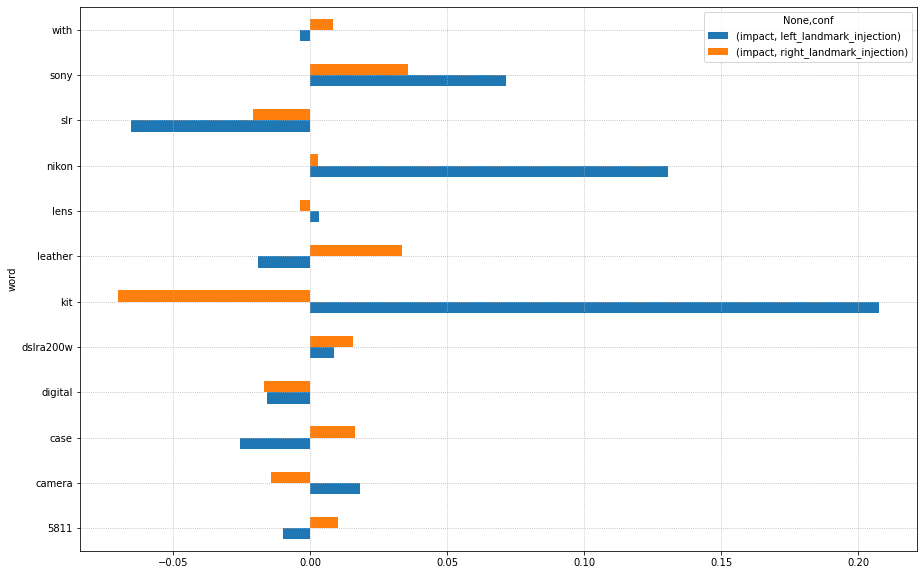

In [66]:
to_plot = exp
figsize = (15,10)
aggregated = to_plot.pivot_table(index='word',values=['impact'],columns=['conf'], aggfunc='max' )
plot = aggregated.plot(kind='barh', figsize=figsize,)
plt.gca().grid(True, linestyle=':', axis='both')
el

,left_name,right_name
270,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811


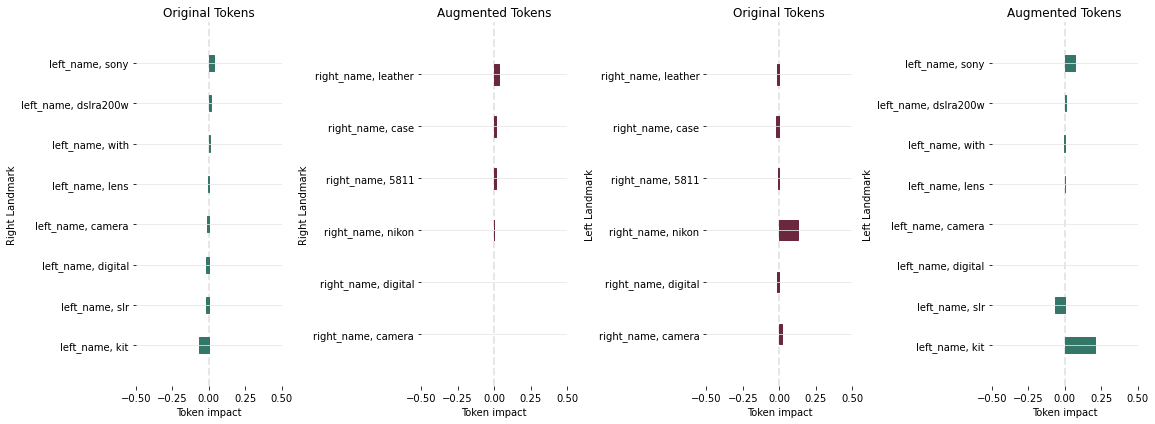

In [67]:
explainer.plot(exp, el)
el[['left_name','right_name']]

In [68]:
explainer.double_explanation_conversion(exp, el)

,column,position,word,score_right_landmark,score_left_landmark
0,left_name,6,kit,-0.070241,0.207600
1,left_name,0,sony,0.035615,0.071540
3,left_name,2,slr,-0.020922,-0.065426
4,left_name,1,digital,-0.016763,0.000000
6,left_name,7,dslra200w,0.015547,0.008594
7,left_name,3,camera,-0.014208,0.000000
9,left_name,4,with,0.008422,-0.003895
10,left_name,5,lens,-0.003609,0.003248
13,right_name,0,nikon,0.002764,0.130764
16,right_name,4,case,0.016193,-0.025753


### NO-MATCH with 'single' mechanism

In [69]:
exp = explainer.explain(el, conf='single')

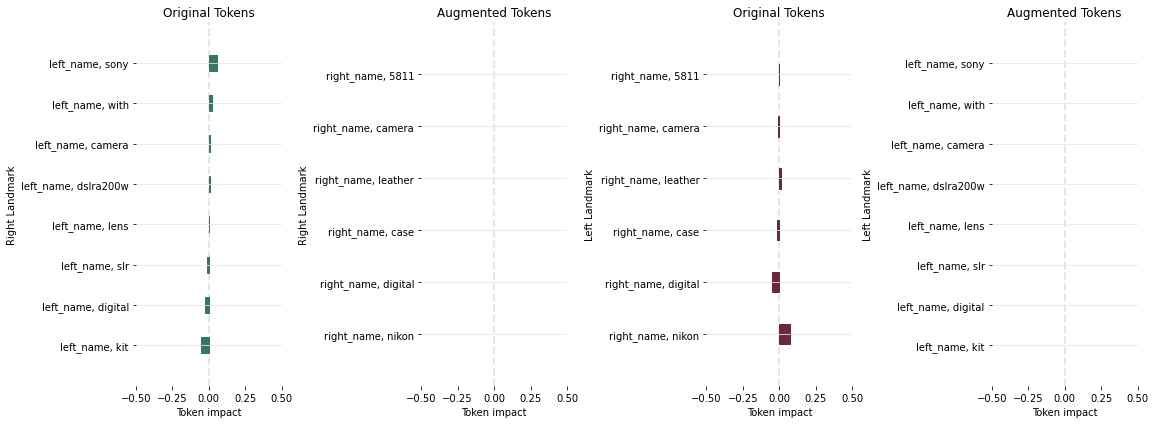

In [70]:
explainer.plot(exp, el) # No augmented (injected) tokens

,id,left_id,right_id,label,left_name,right_name,pred
270,270,574,399,0,sony digital slr camera with lens kit dslra200w,nikon digital camera leather case 5811,0.036606


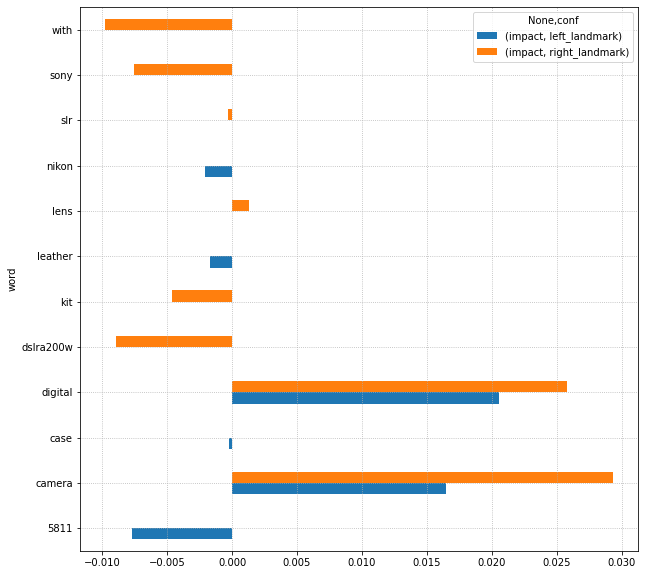

In [ ]:
to_plot = exp
figsize = (10,10)
aggregated = to_plot.pivot_table(index='word',values=['impact'],columns=['conf'], aggfunc='max' )
plot = aggregated.plot(kind='barh', figsize=figsize,)
plt.gca().grid(True, linestyle=':', axis='both')
el